In [1]:
!unzip data1.zip

Archive:  data1.zip
   creating: data1/
  inflating: data1/feature_description.csv  
  inflating: data1/test1_icu_data.csv  
  inflating: data1/test1_icu_label.csv  
  inflating: data1/test2_icu_data.csv  
  inflating: data1/test2_icu_label.csv  
  inflating: data1/train1_icu_data.csv  
  inflating: data1/train1_icu_label.csv  
  inflating: data1/train2_icu_data.csv  
  inflating: data1/train2_icu_label.csv  


# Assignment
Build a logistic regression classifier to classify patients’ survival (0: survived; 1: dead) using 108 features from their ICU records. Use "train1_icu_data.csv" and "train1_icu_label.csv" for training, and "test1_icu_data.csv" and "test1_icu_label.csv" for testing. Scale features before training and use "feature_description.csv" for feature descriptions.

## Load the data

In [2]:
import pandas as pd

train_data = pd.read_csv('/content/data1/train1_icu_data.csv')
train_labels = pd.read_csv('/content/data1/train1_icu_label.csv')
test_data = pd.read_csv('/content/data1/test1_icu_data.csv')
test_labels = pd.read_csv('/content/data1/test1_icu_label.csv')

## Explore and preprocess data


In [3]:
print("Missing values in train_data:")
print(train_data.isnull().sum()[train_data.isnull().sum() > 0])
print("\nMissing values in test_data:")
print(test_data.isnull().sum()[test_data.isnull().sum() > 0])

Missing values in train_data:
Series([], dtype: int64)

Missing values in test_data:
Series([], dtype: int64)


Check for outliers and data types in the training data.



In [4]:
print("Data types in train_data:")
print(train_data.dtypes)

# For outlier detection, we'll focus on numerical columns.
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
print("\nDescriptive statistics for numerical columns in train_data:")
print(train_data[numerical_cols].describe())

Data types in train_data:
age                                        float64
bmi                                        float64
elective_surgery                             int64
height                                     float64
pre_icu_los_days                           float64
                                            ...   
apache_2_bodysystem_Renal/Genitourinary      int64
apache_2_bodysystem_Respiratory              int64
apache_2_bodysystem_Trauma                   int64
apache_2_bodysystem_Undefined Diagnoses      int64
apache_2_bodysystem_Undefined diagnoses      int64
Length: 108, dtype: object

Descriptive statistics for numerical columns in train_data:
               age          bmi  elective_surgery       height  \
count  5000.000000  5000.000000        5000.00000  5000.000000   
mean     64.935800    28.849538           0.12300   169.742832   
std      15.886666     8.494669           0.32847    10.750285   
min      16.000000    14.844926           0.00000   137.20000

We need to scale the numerical features to mitigate the impact of potential outliers.


In [5]:
from sklearn.preprocessing import StandardScaler

# Identify numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Remove binary categorical columns from numerical_cols
binary_cols = [col for col in numerical_cols if train_data[col].nunique() == 2]
numerical_cols = [col for col in numerical_cols if col not in binary_cols]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and testing data
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

print("Scaled numerical features in train_data:")
print(train_data[numerical_cols].head())
print("\nScaled numerical features in test_data:")
print(test_data[numerical_cols].head())

Scaled numerical features in train_data:
        age       bmi    height  pre_icu_los_days    weight  \
0  0.570611  0.097965  0.489075         -0.293947  0.305521   
1 -1.066145  1.020945 -0.162136          0.366640  0.893982   
2 -1.695667 -0.888808 -0.431923         -0.225960 -0.982817   
3  1.200133 -0.948554 -1.380830         -0.249299 -1.303333   
4 -0.436624  0.036755 -0.664498          9.167359 -0.235864   

   apache_2_diagnosis  apache_3j_diagnosis  bun_apache  creatinine_apache  \
0           -0.763503            -0.709234   -0.204455          -0.258036   
1           -0.702712            -0.010400    0.401233          -0.571579   
2            1.619480            -0.479447    0.141652           0.541191   
3           -0.702712            -0.008149    0.141652          -0.018268   
4            1.583005            -0.223868   -0.723616          -0.491657   

   gcs_eyes_apache  ...  d1_calcium_min  d1_glucose_min  d1_hco3_max  \
0        -1.649603  ...       -0.108182      

## Build and train the logistic regression model


In [6]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model
model = LogisticRegression()

# Fit the model to the scaled training data and training labels
# Flatten the labels to a 1D array
model.fit(train_data, train_labels['hospital_death'])

LogisticRegression()

## Evaluate the model
Evaluate the performance of the trained model using the test data and appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
predictions = model.predict(test_data)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7876
Precision: 0.7973
Recall: 0.7697
F1-score: 0.7833


## ROC Curve and AUC

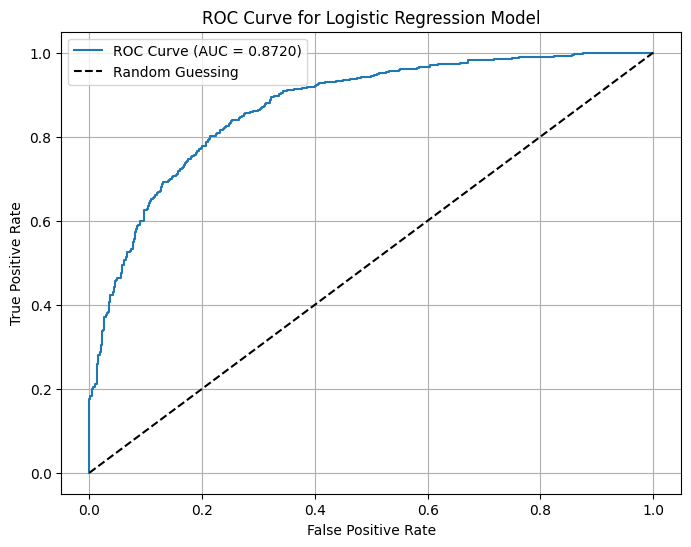

AUC: 0.8720


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities of the positive class (hospital_death = 1)
y_prob = model.predict_proba(test_data)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, y_prob)

# Calculate the AUC
auc = roc_auc_score(test_labels, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC: {auc:.4f}")

## Summary:

### Data Analysis Key Findings

Here's a summary of the model's performance metrics:

| Metric    | Score   |
|-----------|---------|
| Accuracy  | 0.7876  |
| Precision | 0.7973  |
| Recall    | 0.7697  |
| F1-score  | 0.7833  |

* Features with large positive coefficients, such as `solid_tumor_with_metastasis`, `apache_2_bodysystem_Cardiovascular`, and `hepatic_failure`, are associated with a higher likelihood of hospital death.
* Features with large negative coefficients, such as `apache_2_bodysystem_Undefined diagnoses`, `apache_3j_bodysystem_Cardiovascular`, and `elective_surgery`, are associated with a lower likelihood of hospital death.
